# Train and test cleaning

In [1]:
import os
import pandas as pd
import numpy as np
from collections import Counter

# Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

# Random seed for reproducibility
seed = 202
np.random.seed(seed)

# Ignore warnings
import warnings
warnings.simplefilter('ignore')

# Garbage collector
import gc
gc.enable()

### Inspect train.csv and test.csv

In [2]:
train_df = pd.read_csv("train.csv", parse_dates=["first_active_month"])
test_df = pd.read_csv("test.csv", parse_dates=["first_active_month"])
train_df.shape, test_df.shape

((201917, 6), (123623, 5))

In [4]:
train_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [5]:
train_df.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
target                0
dtype: int64

In [6]:
test_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04-01,C_ID_0ab67a22ab,3,3,1
1,2017-01-01,C_ID_130fd0cbdd,2,3,0
2,2017-08-01,C_ID_b709037bc5,5,1,1
3,2017-12-01,C_ID_d27d835a9f,2,1,0
4,2015-12-01,C_ID_2b5e3df5c2,5,1,1


In [7]:
test_df.isnull().sum()

first_active_month    1
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

In [8]:
test_df[test_df['first_active_month'].isnull()]

,first_active_month,card_id,feature_1,feature_2,feature_3
11578,NaT,C_ID_c27b4f80f7,5,2,1


In [9]:
missing_date = pd.to_datetime("2017-09-01").date()
index = 11578
test_df = test_df.set_value(index, 'first_active_month', missing_date)

In [11]:
test_df.isnull().sum()

first_active_month    0
card_id               0
feature_1             0
feature_2             0
feature_3             0
dtype: int64

### Card_id inspect

In [10]:
# Check if there are common card_id between train and test and if this value has more than one occurrence in the sets
print("Number of unique visitors in train set : ",train_df.card_id.nunique(), " out of rows : ",train_df.shape[0])
print("Number of unique visitors in test set : ",test_df.card_id.nunique(), " out of rows : ",test_df.shape[0])
print("Number of common visitors in train and test set : ",len(set(train_df.card_id.unique()).intersection(set(test_df.card_id.unique()))))

Number of unique visitors in train set :  201917  out of rows :  201917
Number of unique visitors in test set :  123623  out of rows :  123623
Number of common visitors in train and test set :  0


### Target inspect

In [12]:
def dens_plot(df, col, df_name="", color='red'):
    cnt_srs = df[col].value_counts()
    cnt_srs = cnt_srs.sort_index()
    plt.figure(figsize=(14,6))
    sns.kdeplot(cnt_srs.index, shade=True, color=color)
    plt.xticks(rotation='vertical')
    title = df_name + "\n" +col
    plt.title(title)
    plt.show()

Target values go from -33.219 to 17.965


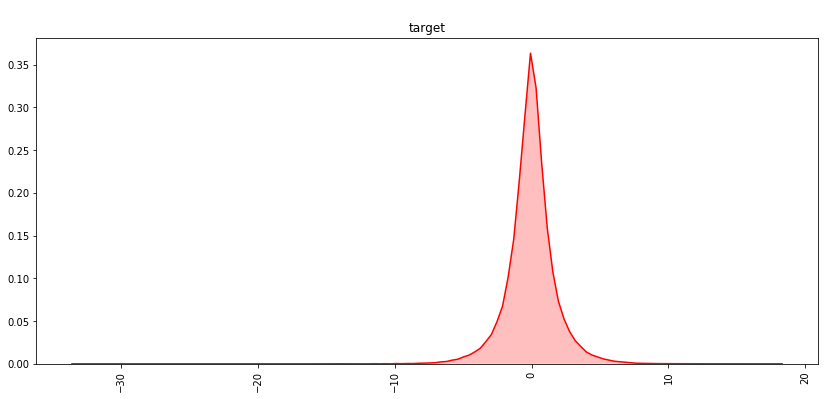

In [13]:
print("Target values go from %.3f to %.3f" % (train_df['target'].min(), train_df['target'].max()))
dens_plot(train_df, "target")

There are 199710 values between -18 and 18 over 201917 total samples


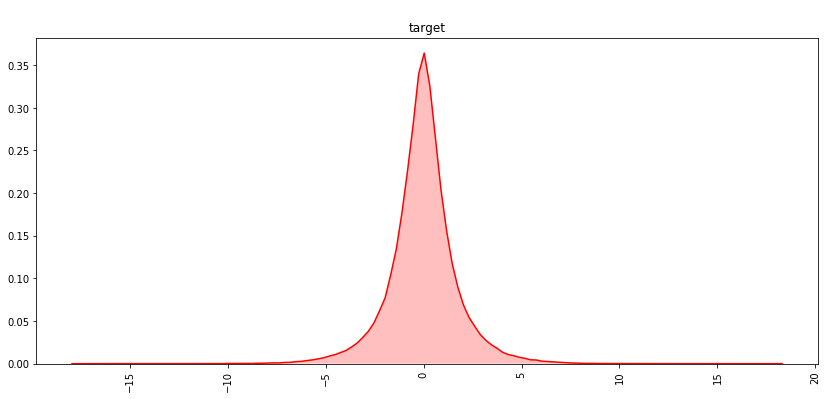

In [14]:
print("There are %d values between -18 and 18 over %d total samples" % (len(train_df[(train_df['target']<18) & (train_df['target']>-18)]), len(train_df)))
dens_plot(train_df[(train_df['target']<18) & (train_df['target']>-18)], "target")

There are 2207 values lower than -18 over 201917 total samples


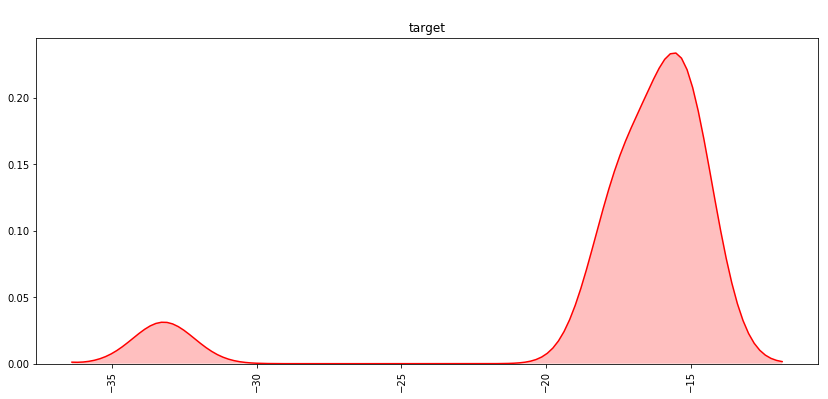

In [15]:
print("There are %d values lower than -18 over %d total samples" % (len(train_df[train_df['target']<-18]), len(train_df)))
dens_plot(train_df[train_df['target']<-15], "target")

There are 0 values greater than 18 over 201917 total samples


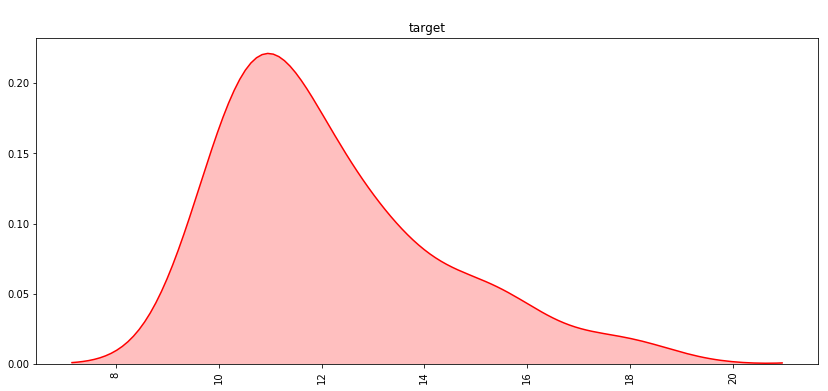

In [16]:
print("There are %d values greater than 18 over %d total samples" % (len(train_df[train_df['target']>18]), len(train_df)))
dens_plot(train_df[train_df['target']>10], "target")

In [17]:
print("The values lower than -20 go from %.6f to %.6f" % (train_df[train_df['target']<-20]['target'].min(), train_df[train_df['target']<-20]['target'].max()))

The values lower than -20 go from -33.219281 to -33.219281


We have about 2207 rows (almost 1% of the data), which has values different from the rest. Since the metric RMSE these rows might play an important role. So beware of them.
Target is normalized between -18 and 18, so the above mentioned samples seems to be missing values, and they have all the same value (-33.219281)

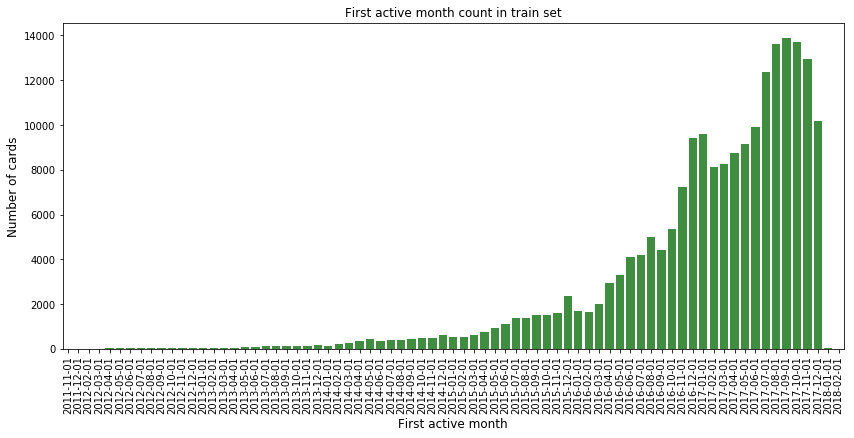

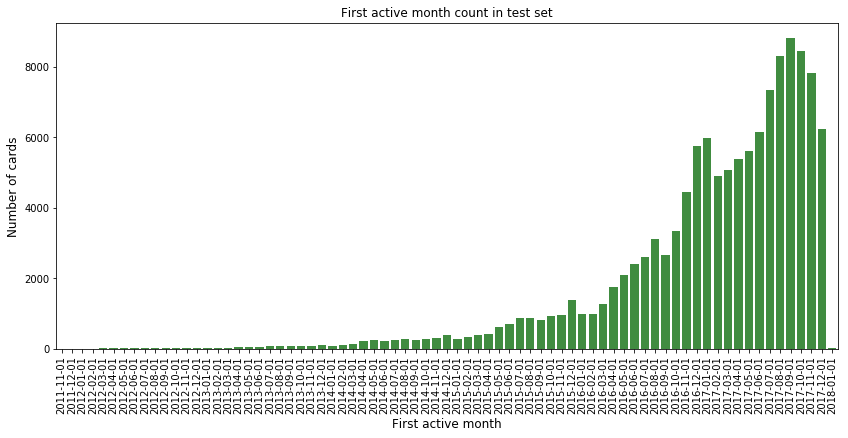

In [18]:
cnt_srs = train_df['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in train set")
plt.show()

cnt_srs = test_df['first_active_month'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('First active month', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("First active month count in test set")
plt.show()

Looks like the distribution is kind of similar between train and test set. So we need not really have to do time based split I think.

In [16]:
print(Counter(train_df['feature_3']))

Counter({1: 114198, 0: 87719})


### Export cleaned dataframes

In [19]:
train_df.to_csv('(1)train.csv', index = False)
test_df.to_csv('(1)test.csv', index = False)